# Performance

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import os
import pytz

## Data

In [3]:

performance_figures_out = '../../generated/figures/performance'
activity_csv_path = '../../generated/database/activity.csv'
timing_csv_path = '../../generated/database/timing.csv'

if not os.path.exists(activity_csv_path):
    raise FileNotFoundError(f"Le fichier {activity_csv_path} n'existe pas. Exécutez le notebook 'notebooks/arrange data/Database data.ipynb' pour le générer.")

if not os.path.exists(timing_csv_path):
    raise FileNotFoundError(f"Le fichier {timing_csv_path} n'existe pas. Exécutez le notebook 'notebooks/arrange data/Database data.ipynb' pour le générer.")

timing_df = pd.read_csv(timing_csv_path)
timing_df['start'] = pd.to_datetime(timing_df['start'], utc=False)
timing_df['end'] = pd.to_datetime(timing_df['end'], utc=False)

df = pd.read_csv(activity_csv_path)
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=False)
df

,user,achievement,points,game_mode,timestamp,group
0,eed81e54-2343-44af-ab2f-cd062db7e11a,AddTestsAchievement,1,Leaderboard,2025-04-17 09:04:05.435083+02:00,B
1,7b25b9f2-5d8e-401e-aefa-ac31e94575d1,RefactorAddXAssertionsAchievement,2,Leaderboard,2025-04-17 09:04:05.979055+02:00,B
2,7b25b9f2-5d8e-401e-aefa-ac31e94575d1,AddTestsAchievement,1,Leaderboard,2025-04-17 09:04:05.992210+02:00,B
3,7b25b9f2-5d8e-401e-aefa-ac31e94575d1,RunXTestSuitesAchievement,1,Leaderboard,2025-04-17 09:04:09.168499+02:00,B
4,7b25b9f2-5d8e-401e-aefa-ac31e94575d1,RunWithCoverageAchievement,1,Leaderboard,2025-04-17 09:04:09.170740+02:00,B
...,...,...,...,...,...,...
1599,11b1644a-d11f-45cb-8a40-282a209059c0,RefactorAddXAssertionsAchievement,1,Leaderboard,2025-04-17 09:58:59.236919+02:00,A
1600,11b1644a-d11f-45cb-8a40-282a209059c0,AddTestsAchievement,1,Leaderboard,2025-04-17 09:58:59.259630+02:00,A
1601,b39dc415-9bb6-4d5d-a8f9-30fd61f6a594,RunXTestSuitesAchievement,1,Leaderboard,2025-04-17 09:58:59.900757+02:00,A
1602,b39dc415-9bb6-4d5d-a8f9-30fd61f6a594,RunWithCoverageAchievement,1,Leaderboard,2025-04-17 09:58:59.918734+02:00,A


## Achievements overview

In [4]:
counts = df["achievement"].value_counts()
counts

achievement
RunXTestSuitesAchievement            576
RefactorAddXAssertionsAchievement    328
AddTestsAchievement                  281
RefactorCodeAchievement              102
RunWithCoverageAchievement            76
CoverXLinesAchievement                63
CoverXMethodsAchievement              63
CoverXClassesAchievement              63
RefactorXTestNamesAchievement         34
CoverXBranchesAchievement             18
Name: count, dtype: int64

## Runs type

In [5]:
df_run = df[(df["achievement"] == "RunXTestSuitesAchievement") | (df["achievement"] == "RunWithCoverageAchievement")]
run_data = df_run.groupby(['group', 'game_mode', 'achievement']).size().reset_index(name='count')
run_data


,group,game_mode,achievement,count
0,A,Achievements,RunWithCoverageAchievement,5
1,A,Achievements,RunXTestSuitesAchievement,111
2,A,Leaderboard,RunWithCoverageAchievement,18
3,A,Leaderboard,RunXTestSuitesAchievement,152
4,B,Achievements,RunWithCoverageAchievement,48
5,B,Achievements,RunXTestSuitesAchievement,230
6,B,Leaderboard,RunWithCoverageAchievement,5
7,B,Leaderboard,RunXTestSuitesAchievement,83


# Nombre de tests par minute

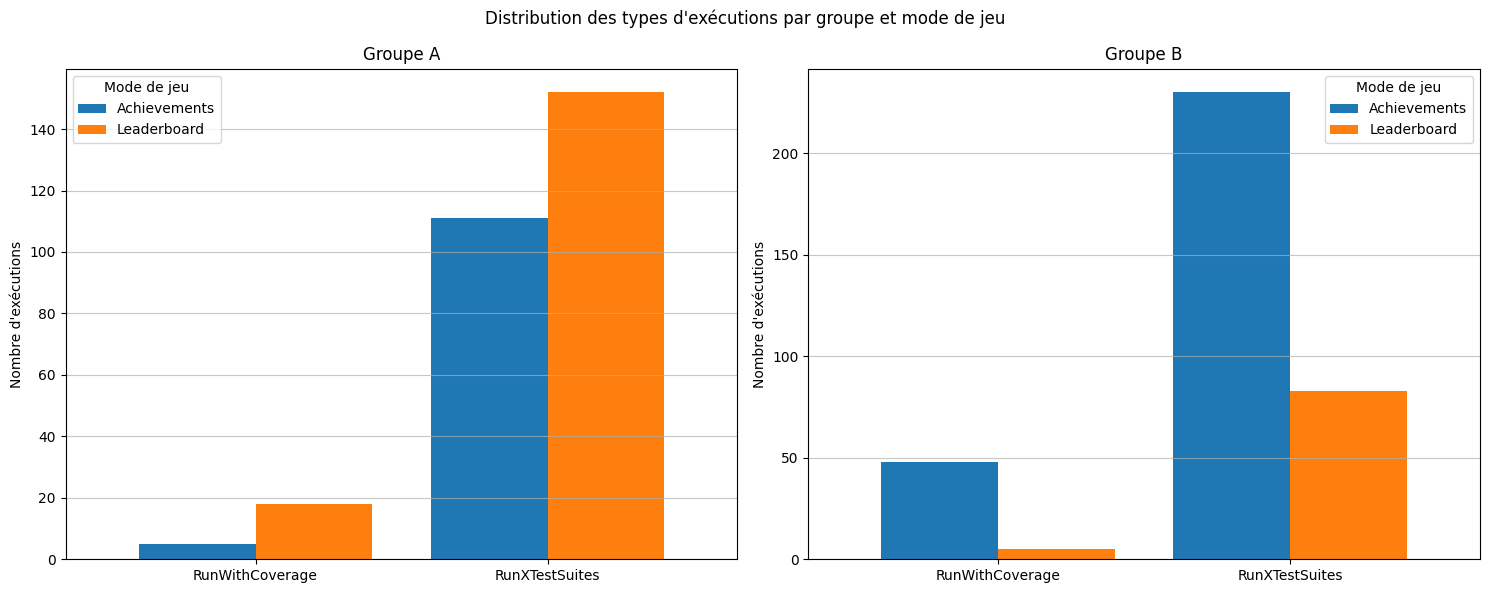

In [15]:
if not os.path.exists(performance_figures_out):
    os.makedirs(performance_figures_out)

# Créer une figure plus compacte et lisible 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Groupe A 
group_a_achievements = run_data[(run_data['group'] == 'A') & (run_data['game_mode'] == 'Achievements')]
group_a_leaderboard = run_data[(run_data['group'] == 'A') & (run_data['game_mode'] == 'Leaderboard')]

group_a_data = pd.DataFrame({
    'Achievements': [
        group_a_achievements[group_a_achievements['achievement'] == 'RunWithCoverageAchievement']['count'].values[0],
        group_a_achievements[group_a_achievements['achievement'] == 'RunXTestSuitesAchievement']['count'].values[0]
    ],
    'Leaderboard': [
        group_a_leaderboard[group_a_leaderboard['achievement'] == 'RunWithCoverageAchievement']['count'].values[0],
        group_a_leaderboard[group_a_leaderboard['achievement'] == 'RunXTestSuitesAchievement']['count'].values[0]
    ]
}, index=['RunWithCoverage', 'RunXTestSuites'])

group_a_data.plot(kind='bar', ax=ax1, width=0.8)
ax1.set_title("Groupe A")
ax1.set_ylabel("Nombre d'exécutions")
ax1.legend(title="Mode de jeu")
ax1.grid(True, axis='y', alpha=0.7)
ax1.tick_params(axis='x', rotation=0)

# Groupe B
group_b_achievements = run_data[(run_data['group'] == 'B') & (run_data['game_mode'] == 'Achievements')]
group_b_leaderboard = run_data[(run_data['group'] == 'B') & (run_data['game_mode'] == 'Leaderboard')]

group_b_rwc_achievement = \
    group_b_achievements[group_b_achievements['achievement'] == 'RunWithCoverageAchievement']['count'].values[0] if not \
        group_b_achievements[group_b_achievements['achievement'] == 'RunWithCoverageAchievement'].empty else 0
group_b_rxts_achievement = \
    group_b_achievements[group_b_achievements['achievement'] == 'RunXTestSuitesAchievement']['count'].values[0] if not \
        group_b_achievements[group_b_achievements['achievement'] == 'RunXTestSuitesAchievement'].empty else 0
group_b_rwc_leaderboard = \
    group_b_leaderboard[group_b_leaderboard['achievement'] == 'RunWithCoverageAchievement']['count'].values[0] if not \
        group_b_leaderboard[group_b_leaderboard['achievement'] == 'RunWithCoverageAchievement'].empty else 0
group_b_rxts_leaderboard = \
    group_b_leaderboard[group_b_leaderboard['achievement'] == 'RunXTestSuitesAchievement']['count'].values[0] if not \
        group_b_leaderboard[group_b_leaderboard['achievement'] == 'RunXTestSuitesAchievement'].empty else 0

group_b_data = pd.DataFrame({
    'Achievements': [group_b_rwc_achievement, group_b_rxts_achievement],
    'Leaderboard': [group_b_rwc_leaderboard, group_b_rxts_leaderboard]
}, index=['RunWithCoverage', 'RunXTestSuites'])

group_b_data.plot(kind='bar', ax=ax2, width=0.8)
ax2.set_title("Groupe B")
ax2.set_ylabel("Nombre d'exécutions")
ax2.legend(title="Mode de jeu")
ax2.grid(True, axis='y', alpha=0.7)
ax2.tick_params(axis='x', rotation=0)

plt.suptitle("Distribution des types d'exécutions par groupe et mode de jeu")
plt.tight_layout()
plt.savefig(f'{performance_figures_out}/runs_type_by_group_and_game_mode.pdf')
plt.show()

# Nombre de tests cumulé par minute

<Figure size 640x480 with 0 Axes>

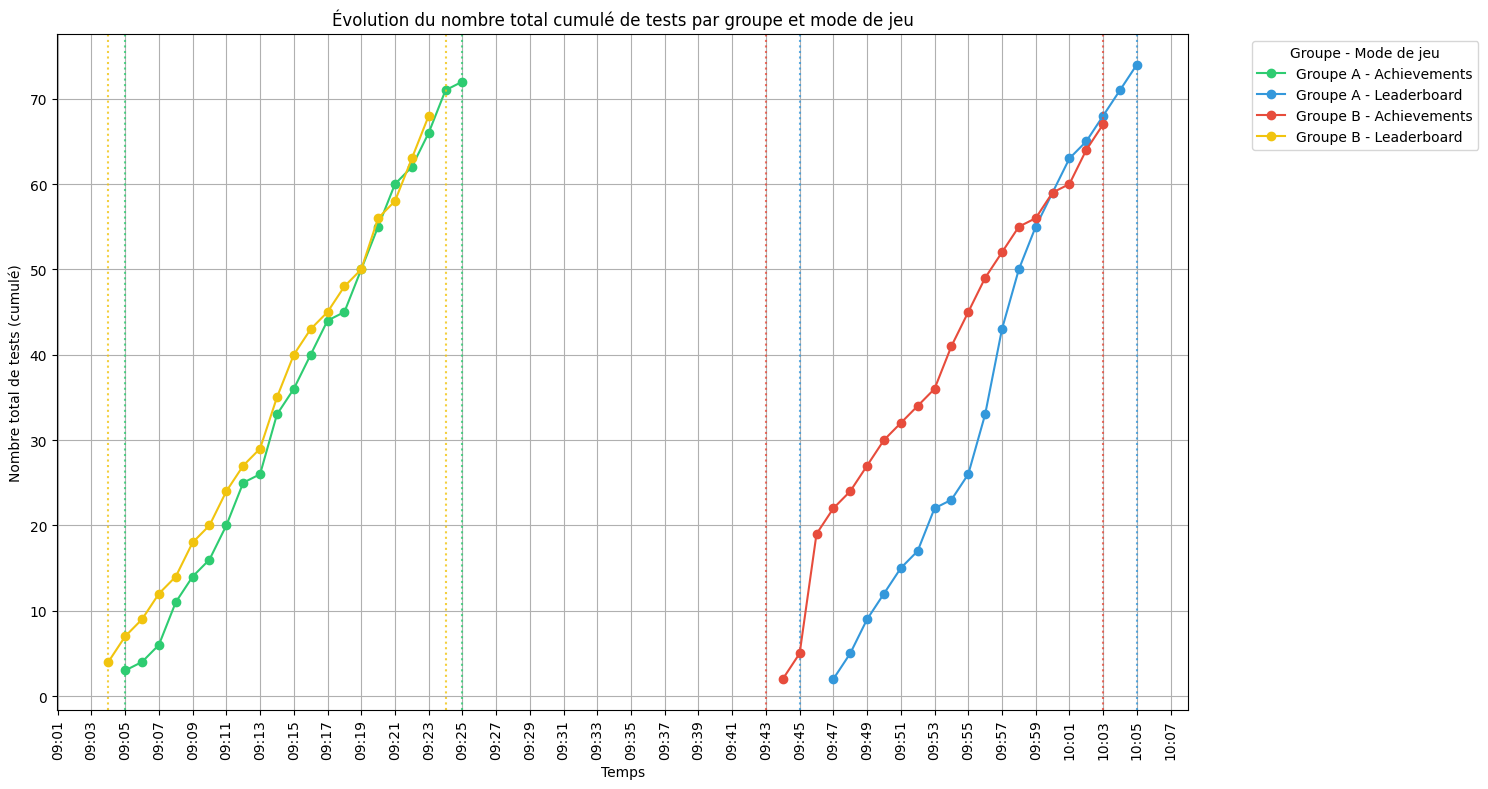

In [7]:
if not os.path.exists(performance_figures_out):
    os.makedirs(performance_figures_out)

df_all_tests = df[df['achievement'] == 'AddTestsAchievement'].copy()
df_all_tests['minute'] = df_all_tests['timestamp'].dt.floor('min')

total_tests_per_minute = df_all_tests.groupby(['minute', 'group', 'game_mode']).size().reset_index(name='count')
total_tests_per_minute = total_tests_per_minute.sort_values('minute')

plt.clf()  # Clear the current figure
fig, ax = plt.subplots(figsize=(15, 8))

# Define colors for different groups and modes
colors = {
    ('A', 'Achievements'): '#2ecc71',  # Vert émeraude
    ('A', 'Leaderboard'): '#3498db',  # Bleu clair
    ('B', 'Achievements'): '#e74c3c',  # Rouge clair
    ('B', 'Leaderboard'): '#f1c40f'  # Jaune or
}

# Plot cumulative data first
for group in ['A', 'B']:
    for mode in ['Achievements', 'Leaderboard']:
        data = total_tests_per_minute[(total_tests_per_minute['group'] == group) & (total_tests_per_minute['game_mode'] == mode)]

        data = data.sort_values('minute')
        data['cumulative_count'] = data['count'].cumsum()

        line_color = colors[(group, mode)]
        plt.plot(data['minute'], data['cumulative_count'], label=f'Groupe {group} - {mode}', color=line_color, marker='o')

        sessions = timing_df[(timing_df['group'] == group) & (timing_df['game_mode'] == mode)]

        for _, session in sessions.iterrows():
            start_time = session['start'].floor('min')
            end_time = session['end'].floor('min')
            plt.axvline(x=start_time, color=line_color, linestyle=':', alpha=0.8)
            plt.axvline(x=end_time, color=line_color, linestyle=':', alpha=0.8)

plt.title('Évolution du nombre total cumulé de tests par groupe et mode de jeu')
plt.xlabel('Temps')
plt.ylabel('Nombre total de tests (cumulé)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=pytz.timezone('Europe/Brussels')))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=2))
plt.xticks(rotation=90)

# Remove duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Groupe - Mode de jeu', bbox_to_anchor=(1.05, 1))

plt.grid(True)
plt.tight_layout()
plt.savefig(f'{performance_figures_out}/created_tests_count_cumsum.pdf')
plt.show()


<Figure size 1000x600 with 0 Axes>

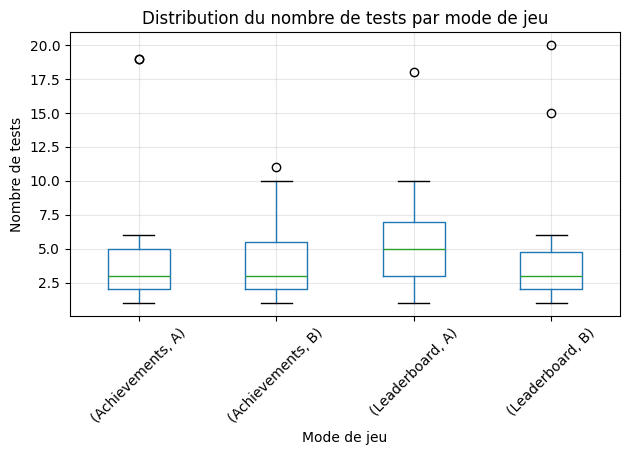

,user,game_mode,group,count
0,0d271530-be17-4538-bf04-dde3c6069b5f,Achievements,A,19
1,0d271530-be17-4538-bf04-dde3c6069b5f,Leaderboard,A,10
2,11555248-3f01-4d1c-9a71-ef7caf9150fa,Leaderboard,B,1
3,11b1644a-d11f-45cb-8a40-282a209059c0,Achievements,A,19
4,11b1644a-d11f-45cb-8a40-282a209059c0,Leaderboard,A,18
5,1f06f352-91b6-4373-87ed-5a5070723efb,Achievements,A,6
6,1f06f352-91b6-4373-87ed-5a5070723efb,Leaderboard,A,6
7,223bf16c-aaad-404f-8a47-61f3ced741e4,Achievements,A,4
8,223bf16c-aaad-404f-8a47-61f3ced741e4,Leaderboard,A,9
9,2b2965f7-5d66-4569-802b-27c84aa69bff,Achievements,B,1


In [32]:
if not os.path.exists(performance_figures_out):
    os.makedirs(performance_figures_out)

# Création de la colonne count dans df_all_tests 
df_all_tests = df[df['achievement'] == 'AddTestsAchievement'].groupby(['user', 'game_mode', 'group']).size().reset_index(
    name='count')

plt.figure(figsize=(10, 6))

# Create boxplot with groups split by game mode
boxplot = df_all_tests.boxplot(column='count', by=['game_mode', 'group'])

plt.title('Distribution du nombre de tests par mode de jeu')
plt.suptitle('')  # Remove automatic suptitle
plt.xlabel('Mode de jeu')
plt.ylabel('Nombre de tests')

plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

<Figure size 640x480 with 0 Axes>

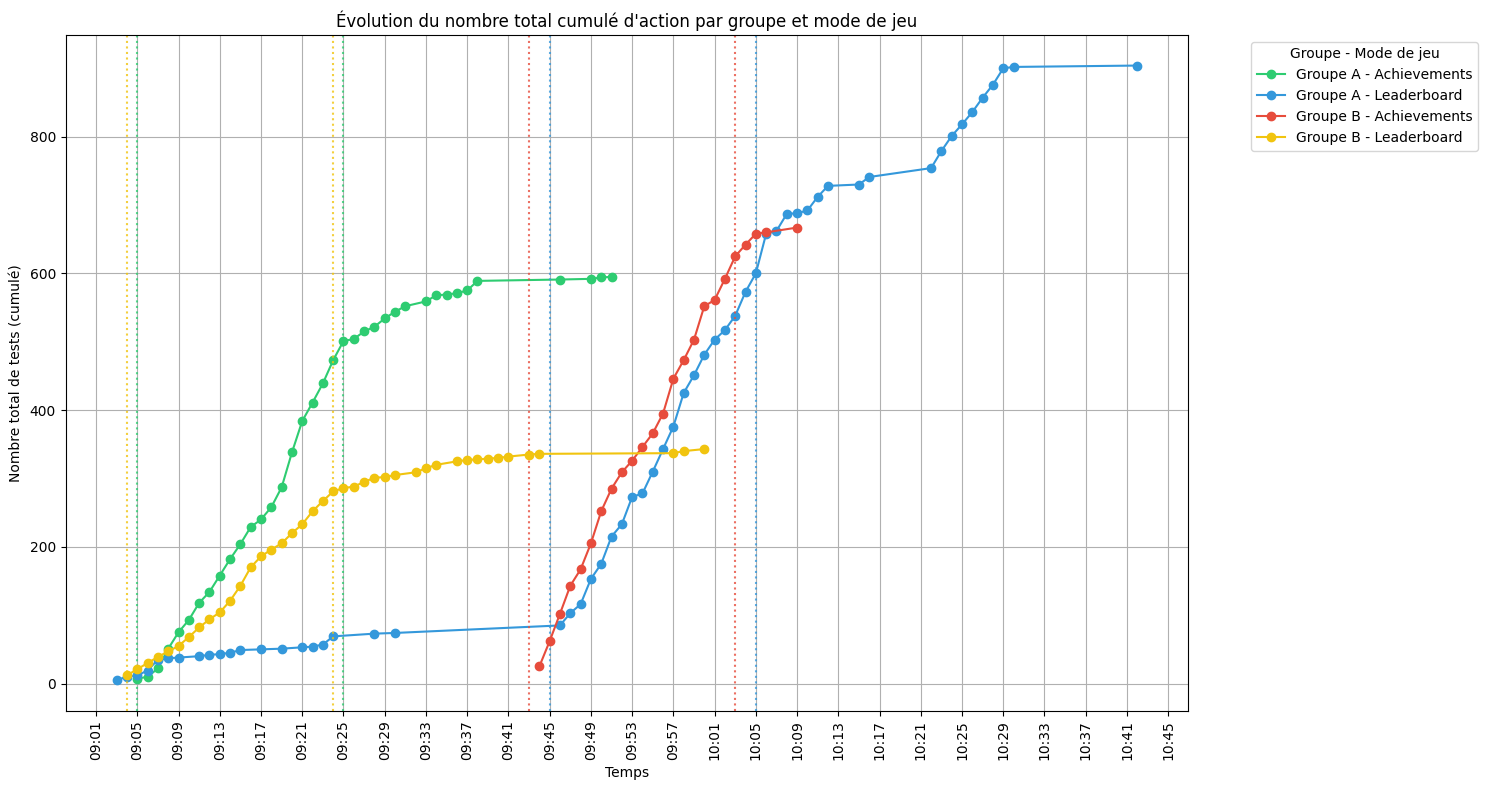

In [8]:
import pandas as pd
df_activity = pd.read_csv('../../generated/database/activity-brut.csv', sep = ',')
df_activity['timestamp'] = pd.to_datetime(df_activity['timestamp'], utc=False)

if not os.path.exists(performance_figures_out):
    os.makedirs(performance_figures_out)

df_all_tests = df_activity.copy()
df_all_tests['minute'] = df_all_tests['timestamp'].dt.floor('min')

total_tests_per_minute = df_all_tests.groupby(['minute', 'group', 'game_mode']).size().reset_index(name='count')
total_tests_per_minute = total_tests_per_minute.sort_values('minute')

plt.clf()  # Clear the current figure
fig, ax = plt.subplots(figsize=(15, 8))

# Define colors for different groups and modes
colors = {
    ('A', 'Achievements'): '#2ecc71',  # Vert émeraude
    ('A', 'Leaderboard'): '#3498db',  # Bleu clair
    ('B', 'Achievements'): '#e74c3c',  # Rouge clair
    ('B', 'Leaderboard'): '#f1c40f'  # Jaune or
}

# Plot cumulative data first
for group in ['A', 'B']:
    for mode in ['Achievements', 'Leaderboard']:
        data = total_tests_per_minute[
            (total_tests_per_minute['group'] == group) & (total_tests_per_minute['game_mode'] == mode)]

        data = data.sort_values('minute')
        data['cumulative_count'] = data['count'].cumsum()

        line_color = colors[(group, mode)]
        plt.plot(data['minute'], data['cumulative_count'],
                 label=f'Groupe {group} - {mode}',
                 color=line_color,
                 marker='o')

        # Plot session vertical lines with same color
        sessions = timing_df[(timing_df['group'] == group) & (timing_df['game_mode'] == mode)]
        for _, session in sessions.iterrows():
            start_time = session['start'].floor('min')
            end_time = session['end'].floor('min')
            plt.axvline(x=start_time, color=line_color, linestyle=':', alpha=0.8)
            plt.axvline(x=end_time, color=line_color, linestyle=':', alpha=0.8)

plt.title('Évolution du nombre total cumulé d\'action par groupe et mode de jeu')
plt.xlabel('Temps')
plt.ylabel('Nombre total de tests (cumulé)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=pytz.timezone('Europe/Brussels')))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=4))
plt.xticks(rotation=90)

# Remove duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),
           title='Groupe - Mode de jeu',
           bbox_to_anchor=(1.05, 1))

plt.grid(True)
plt.tight_layout()
plt.savefig(f'{performance_figures_out}/actions_count_full_cumsum.pdf')
plt.show()
